# Welcome to Lab: Justice ⚖️

We plan on continuing to explore simulation in Python this week. However, this time, we're going to simulate some **real-world events** that have actually happened in the past.  The goal is for you to see how we can use data science to think about issues of **equity** and **social justice**.  As usual, in addition to coding, we want you to get practice having **discussions about the data science** you're doing and think about how data science can be a useful tool that can help you in your future job and as a citizen.

**IMPORTANT NOTE**: In this lab, it's *very* important that you read through the text carefully. Understanding the context is crucial for success in `lab_justice` :)

A few tips to remember:

- **You are not alone on your journey in learning programming!**  You have your lab Teaching Assistant, your CAs, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help!  When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same **<i>ah-hah</i>** moment!
- We are here to help you!  Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [1]:
# Meet your CAs and TA if you haven't already!
# First name is enough, we'll know who they are! :)
ta_name = "Kunlun"
ca1_name = "Jessica"
ca2_name = "Jai"
ca3_name = ""


# Working with your group will be particularly important for discussion purposes in this week's lab!
#
# QOTD to Ask Your Group: "What is your favorite restaurant in Campustown/Champaign/Urbana?"
partner1_name = "Christ Goncalves"
partner1_netid = "christg2"
partner1_restaurant = "Mcdonald's"

partner2_name = "Beichen"
partner2_netid = "beichen7"
partner2_restaurant = "Cravings"

partner3_name = ""
partner3_netid = ""
partner3_restaurant = ""

<hr style="color: #DD3403;">

# Part 1: Jury Selection + Simulation

The 6th Amendment to the U.S. Constitution provides the right to an **“impartial jury”** in criminal prosecutions, but what exactly does this mean? The Supreme Court has said that juries must be drawn from a representative cross-section of the community. In other words, juries should be **randomly selected** from the eligible population. However, there are many instances in history where it doesn’t seem like this was the case.

Take for example, the case of Berghuis v. Smith.  In 1993, Smith (a Black man) was convicted of 2nd-degree murder by an **all-white** jury and sentenced to life in prison. The jury was selected from a panel of about 100 randomly selected people. Only 3 of them were Black and none of those 3 made it into the final 37 considered for Smith’s trial. The county population was approximately 8 percent Black at the time of the trial.  Remember, jury panels are supposed to be selected at random from the eligible population.

### Analysis: Your Initial Thoughts
**Group Discussion: Because 8% of the eligible population was Black, 3 Black people on a panel of 100 might seem low.  Does this difference (8% vs. 3%) seem big to you? Do you think this could be due to chance?**

**Q1: Write a few sentences summarizing what your group members said during your discussion.  Did people think this difference could have been due to chance or not?**


*(My group members felt the difference between 8% and 3 Black jurors could indicate a flaw in the selection process, while I thought it might be due to chance, since random sampling can lead to uneven outcomes. However, there was concern about the fairness of the process.)*

This case was appealed and sent to the Supreme Court.  Some people claimed that the overall percentage disparity (between 8% and 3%) was small and reflected no attempt to include or exclude "a specified number of Black people from the jury." They claimed this "small" difference could simply be due to chance.  Critics and Smith claimed that the system of jury selection caused the lack of fair and reasonable representation of Black people on the jury.

## Puzzle 1.1: Writing a Function

Let’s do a simulation in Python to understand what’s going on.  We will eventually write a simulation to show the expected distribution.  

Remember, from the case: we're trying to see if the difference between 8% and 3% is small and reflects no attempt to include or exclude "a specified number of Black people."  In other words, we want to **write a function** to **randomly sample 100 people from a population that is 8% Black**. The function should `return` the **number of Black people in the simulated jury**.  We can do this multiple times and see how rare it is to get 3 or fewer Black people in the jury.

First, using the cell below, import any necessary Python libraries. To write this simulation, `pandas` and `random` might be useful...

In [2]:
import pandas as pd
import random

Then, in the following cell, define our simulation function. Remember, the function should **randomly sample 100 people from a population that is 8% Black**. The function should `return` the **number of Black people in the simulated jury**.

In [3]:
def simulateJuryPanel():
  result = 0
  for i in range(100):
    selected_jury = random.randint(1,100)
    if selected_jury <= 8:
      result += 1
  return result

### 🔬 Test Case Checkpoint 🔬

In [4]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cells.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert callable(simulateJuryPanel), "You should have defined `simulateJuryPanel` as a function above."
assert isinstance(simulateJuryPanel(), int), "Your simulateJuryPanel() function should return an integer that represents the number of Black people on a jury from a population that is 8% Black."
test_juries = [simulateJuryPanel() for i in range(20)]
for jury in test_juries:
    assert(0 <= jury <= 100), "Your simulateJuryPanel() should only return integers between 0 and 100."
assert abs((sum(test_juries) / 20) - 8) <= 3, "Your calculations in simulateJuryPanel() are incorrect."
def check(list):
    return(all(i==list[0] for i in list))
assert(check(test_juries) == False), "Your simulation is returning the same number in every iteration. This is incorrect since we are randomly sampling from a population that is 8% Black."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.2: Storing Simulation Results

Now that we have a working `simulateJuryPanel()` function, let's do a simulation and store the results in a DataFrame for analysis. Let’s start by doing this simulation **1000 times**. Simulate choosing **1000 jury panels** by calling `simulateJuryPanel()` each time and store the number of Black people selected in every panel. Store these results in a DataFrame named `df`.

The variable or column in the DataFrame should be named `panel`.

In [5]:
data = []
for i in range(1000):
    panel = simulateJuryPanel()
    d = {'panel':panel}
    data.append(d)
df = pd.DataFrame(data)
df

,panel
0,8
1,9
2,15
3,16
4,9
...,...
995,7
996,13
997,4
998,5


### 🔬 Test Case Checkpoint 🔬

In [6]:
## == TEST CASES for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
assert('df' in vars()), "Make sure your DataFrame is named `df`."
assert('panel' in df.columns.to_list()), "Make sure your simulations are stored in a column named `panel`."
assert(len(df) == 1000), "Your DataFrame is the wrong length. Perhaps you did not simulate 1000 times?"
assert(df['panel'].mean() < 10), "Your simulation isn't accurately simulating a randomly selected jury panel. You just created a function for this!"
assert(df['panel'].mean() > 5), "Your simulation isn't accurately simulating a randomly selected jury panel. You just created a function for this!"

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.3: Visualization

Now, let's visualize the results of our simulation.  Since the number of Black jurors that are selected as part of the panel is a discrete variable that represents a category of results, it is best visualized with a **frequency bar chart** (histograms are best for continuous data).

Follow our DISCOVERY Guide: "Creating a Frequency Bar Chart from a DataFrame" to create a frequency bar chart.
- [DISCOVERY Guide: Creating a Frequency Bar Chart from a DataFrame](https://discovery.cs.illinois.edu/guides/Data-Visualization/value-counts-bar-chart/)

Create your frequency bar chart below:

<Axes: >

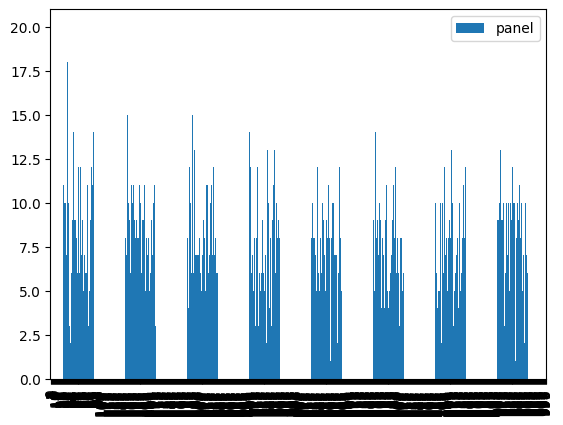

In [7]:
df.plot.bar()

### Analysis: Simulating Juries

**Group Discussion: Interpret the results of your frequency bar chart.**

**Q2: Write down the most interesting takeaway from your group discussion.**

*(There are rarely extreme value higher than 12, most the number of balck are under 8)*

## Puzzle 1.4: Observed and Expected Value

### Analysis: Expected Value
**Q3: Considering our population metrics, what was the expected value for the number of Black people in the jury?**  

*(100 * 0.08 * 1000 = 8000, so the expected value for the number of Black peope in the jury under 1000 simulations is about 8000, and the expected value for each simulation is about 8)*

Using our simulation, we will observe and note any differences between the actual mean number of Black people in the juries and our expected value.

Using the cell below, calculate the `mean` number of Black people in a jury from our `df` that you created from the simulation. Store your result in the variable `mean`.

In [8]:
mean = df["panel"].mean()
mean

np.float64(8.039)

### 🔬 Test Case Checkpoint 🔬

In [9]:
## == TEST CASES for Puzzle 1.4 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
assert('mean' in vars()), "You should store your calculated result for the mean in a variable named `mean`."
assert(mean < 10), "You didn't calculate the mean correctly!"
assert(mean > 5), "You didn't calculate the mean correctly!"

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.5: Probability

Now that we've done simulation and some analysis, let's **estimate the probability** that we'll get **3 or less** Black members of the jury using `df`.  Store your results in a variable named `probability`. You may want to think back to conditionals - that'll help here.

In [10]:
number_3 = df[df["panel"] <= 3]
probability = len(number_3)/1000
probability

0.044

### 🔬 Test Case Checkpoint 🔬

In [11]:
## == TEST CASES for Puzzle 1.5 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
assert('probability' in vars()), "Your probability should be stored in a variable named `probability`."
assert(probability < 0.05), "You didn't calculate the probability correctly!"
assert(probability > 0), "You didn't calculate the probability correctly!"

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Analysis: Final Jury Reflections

**Q4: Answer to the following:**

- (a) What does this probability mean?
- (b) Given this probability, do you think the outcome that was observed in our case was due to chance or not?

*(a.This means there are 0.34 simultations have the balck people less than 3 which is a large extreme value influence our data. 
b.According to this probability, I think our outcome is due to chance since 0.34 is a large probability)*

<hr style="color: #DD3403;">

# Part 2: Names and Resumes

Our next problem comes from a study looking at the correlation between names and the job hiring process.  You can read the full study here if you’d like:
>[https://www.nber.org/system/files/working_papers/w9873/w9873.pdf](https://www.nber.org/system/files/working_papers/w9873/w9873.pdf)

Here’s a summary of some findings from their study:
- The researchers sent out a total of **4,890 resumes** to postings in Chicago and Boston.
- The resumes that they sent were **identical**, except they changed the **names and email addresses** to have either a "white sounding" name or a "black sounding" name, according to the study.  
- There were an equal number of resumes with "white sounding" and "black sounding" names sent out (2,445 each).
- The resumes with "white sounding" names were called back for an interview **10.06%** of the time while the "black sounding" names were called back for an interview **6.87%** of the time.

### Analysis: Initial Thoughts

**Q5 (Group Discussion): Before we start coding, let’s think about this. Consider the results from the study above. Do you think this is a significant difference? Why do you think this happened? Why or why not is this problematic?**

*(Many group members believed the difference in callback rates (10.06% for "white sounding" names vs. 6.87% for "black sounding" names) is statistically significant due to the large sample size. They suggested that implicit biases among hiring managers might influence these outcomes, as names can trigger stereotypes. This is problematic because it undermines equal opportunity in hiring and perpetuates systemic racism, preventing qualified candidates from being considered based solely on their names.)*

**Assuming** that **any given resume** has about an **8.47% chance** of getting a callback **(the average callback rate observed across all resumes)**, let’s simulate this study.

Since the content of the resumes are identical, we should expect to get an **equal number of callbacks** for both types of names.  In other words, picking the callbacks should be like **random sampling**.

We've simulated the data in `resumes.csv` and wrote part of a simulation function to randomly sample 8.47% of the **4,890** resumes 10,000 times. You will load in the data and complete the simulation below.

## Puzzle 2.1: Load in the Data

In the same folder as this lab, you have a **dataset of resumes** named `resumes.csv` that contains **4,890 rows** - the **same number** of resumes used in the study.

Half are 0s (representing resumes with "white sounding" names) and the other half are 1s (representing resumes with "black sounding" names).

Using `pd.read_csv`, load this data into a DataFrame named `df_resumes`:

In [12]:
df_resumes = pd.read_csv("resumes.csv")
df_resumes

,Resumes
0,0
1,0
2,0
3,0
4,0
...,...
4885,1
4886,1
4887,1
4888,1


### 🔬 Test Case Checkpoint 🔬

In [13]:
## == TEST CASES for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
assert('df_resumes' in vars()), "Your DataFrame of resumes should be named `df3`."
assert((len(df_resumes) == 4890) & ('Resumes' in df_resumes.columns.to_list())), "This isn't the dataset we are looking for. Make sure you are loading the resumes.csv file."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.2: Sampling the DataFrame for 8.47% of the Resumes

Create a new DataFrame called `df_sample` that contains a random sample of 8.47% of all resumes in `df_resumes`.  This sample represents all of the resumes that received a call back if the resumes **were truly randomly selected without bias**:

In [14]:
sample_size = len(df_resumes) * 0.0847
df_sample = df_resumes.sample(n=int(sample_size))
df_sample

,Resumes
501,0
3183,1
1475,0
2523,1
1332,0
...,...
347,0
4207,1
4858,1
4553,1


### 🔬 Test Case Checkpoint 🔬

In [15]:
## == TEST CASES for Puzzle 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
assert ("df_sample" in vars()), "Make sure your dataframe is named `df_sample`."
assert (abs(len(df_resumes) * 0.0847 - len(df_sample)) <= 1), "Your parameter in .sample() is incorrect."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Storing the `callbacks_white_sounding` and `callbacks_black_sounding` Names

Using your `df_sample` (the sample of all people who received callbacks), calculate two values in the next two cells:

- `callbacks_black_sounding`, the number of callbacks received by people with Black-sounding names
- `callbacks_white_sounding`, the number of callbacks received by people with white-sounding names

In [28]:
callbacks_black_sounding = df_sample[df_sample["Resumes"] == 1]
callbacks_black_sounding

,Resumes
3883,1
3739,1
4369,1
3789,1
4444,1
...,...
4167,1
4031,1
3799,1
3323,1


In [16]:
callbacks_white_sounding = df_sample[df_sample["Resumes"] == 0]
callbacks_white_sounding

,Resumes
501,0
1475,0
1332,0
380,0
482,0
...,...
1620,0
2171,0
402,0
347,0


## Puzzle 2.3: Build a Simulation

Using your code from Puzzle 2.2 as the real-world events, write a simulation that simulates randomly selecting a sample of 8.47% of the resumes 1,000 times and recording how many `callbacks_black_sounding` and `callbacks_white_sounding` names you got in each iteration.

In recording each observation, you only need to record the `callbacks_black_sounding` and `callbacks_white_sounding` variables. In other words, your dictionary `d` will be:

> ```py
> d = { "callbacks_black_sounding": callbacks_black_sounding, "callbacks_white_sounding": callbacks_white_sounding }
> ```

Store the result of 1,000 simulations in the variable `df_simulation`:

In [31]:
# Complete a simulation 1,000 times:
data = []
sample_size = (len(df_resumes) * 0.0847)
for i in range(1000):
    df_sample = df_resumes.sample(n=int(sample_size))
    callbacks_black_sounding = df_sample[df_sample["Resumes"] == 1].shape[0]
    callbacks_white_sounding = df_sample[df_sample["Resumes"] == 0].shape[0]
    d = { "callbacks_black_sounding": callbacks_black_sounding, "callbacks_white_sounding": callbacks_white_sounding }
    data.append(d)
df_simulation = pd.DataFrame(data)


In [32]:
# Display the result of the simulation:
df_simulation

,callbacks_black_sounding,callbacks_white_sounding
0,211,203
1,193,221
2,198,216
3,196,218
4,204,210
...,...,...
995,217,197
996,204,210
997,208,206
998,203,211


### 🔬 Test Case Checkpoint 🔬

In [33]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.

assert("df_simulation" in vars()), "Make sure your resulting dataframe is named `df_simulation`."
assert("callbacks_black_sounding" in df_simulation), "You've labeled your `callbacks_black_sounding` column incorrectly."
assert("callbacks_white_sounding" in df_simulation), "You've labeled your `callbacks_white_sounding` column incorrectly."

assert( len(df_simulation[ df_simulation["callbacks_white_sounding"] > df_simulation["callbacks_black_sounding"] ]) > 0 )
assert( len(df_simulation[ df_simulation["callbacks_white_sounding"] < df_simulation["callbacks_black_sounding"] ]) > 0 )

assert( df_simulation["callbacks_white_sounding"].sum() > 190000 ), "Make sure your for loop runs 1000 times."
assert( df_simulation["callbacks_black_sounding"].sum() > 190000 ), "Make sure your for loop runs 1000 times."

assert( df_simulation["callbacks_white_sounding"].sum() < 230000 ), "Make sure your for loop runs 1000 times."
assert( df_simulation["callbacks_black_sounding"].sum() < 230000 ), "Make sure your for loop runs 1000 times."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.4: Calculate the Size of the Difference Between Groups

Add a new column to your simulation DataFrame called `callbacks_difference` that is the magnitude of the absolute difference in number of callbacks between the two groups in your simulation.  Each row is the difference in the number of callbacks if resumes were randomly selected without bias.

*Hint: Use the function `abs()` to get the absolute value of a number, or in this case, the absolute value of the difference between the two groups.*


In [34]:
# Add the new column "callbacks_difference":
df_simulation["callbacks_difference"] = abs(df_simulation["callbacks_black_sounding"] - df_simulation["callbacks_white_sounding"])
df_simulation

,callbacks_black_sounding,callbacks_white_sounding,callbacks_difference
0,211,203,8
1,193,221,28
2,198,216,18
3,196,218,22
4,204,210,6
...,...,...,...
995,217,197,20
996,204,210,6
997,208,206,2
998,203,211,8


### 🔬 Test Case Checkpoint 🔬

In [35]:
## == TEST CASES for Puzzle 2.4 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
assert("callbacks_difference" in df_simulation), "Make sure your new column is called `callbacks_difference`."
assert( (abs(df_simulation["callbacks_black_sounding"] - df_simulation["callbacks_white_sounding"]) - df_simulation["callbacks_difference"]).sum() == 0 ), "Make sure you are taking the absolute value of the difference using `abs()."
assert(df_simulation["callbacks_difference"].mean() < 40), "Make sure you are taking the absolute value of the difference using `abs()."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.5: Finding the Samples with a Larger Impact

In the study presented, the Black-sounding names were called back only 6.87% of the time and the white-sounding names were called back 10.02% of the time.  Of all the 4,890 resumes, the Black-sounding names were called back 168 times and the white-sounding names were called back 245 times. In other words, there was a **difference of 77 callbacks** between the two groups.

Using your `df_simulation` DataFrame, select all of the rows with **77 or more callbacks** in the column `callbacks_difference`:

In [38]:
More_callbacks = df_simulation[df_simulation["callbacks_difference"] >= 77]
More_callbacks

,callbacks_black_sounding,callbacks_white_sounding,callbacks_difference


Now, using your code from above, calculate the **proportion** of simulations that had a difference of **77 or more callbacks** in the cell below.

In [39]:
proportion = len(More_callbacks)/len(df_simulation)
proportion

0.0

## Analysis: Final Resume Names Reflection

**Q6: Answer to the following:**

- (a) What does this proportion mean?
- (b) Given this proportion, do you think the outcome that was observed in this study was due to chance or not?

*(a.There are no difference equal or larger than 77 between two groups. b.In this case, I think the outcome in this study was not due to chance. In other words, the outcome is statistically significant, and the difference in callbacks between Black-sounding and white-sounding names likely reflects a real bias or discrimination, rather than random variation.)*

<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make sure to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook & follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission & provide you feedback after the lab is due. :)